In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report



In [2]:
df=pd.read_csv(r"C:\Users\dell\OneDrive\Desktop\loandata.csv")

In [65]:
print(df)

     Gender  Married  Dependents  Education Self_Employed  ApplicantIncome  \
0         0        0           0          1            No             5849   
1         0        1           1          1            No             4583   
2         0        1           0          1           Yes             3000   
3         0        1           0          0            No             2583   
4         0        0           0          1            No             6000   
..      ...      ...         ...        ...           ...              ...   
609       1        0           0          1            No             2900   
610       0        1           3          1            No             4106   
611       0        1           1          1            No             8072   
612       0        1           2          1            No             7583   
613       1        0           0          1           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term Property_A

In [66]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area
0,0,0,0,1,No,5849,0.0,146,360,Urban
1,0,1,1,1,No,4583,1508.0,128,360,Rural
2,0,1,0,1,Yes,3000,0.0,66,360,Urban
3,0,1,0,0,No,2583,2358.0,120,360,Urban
4,0,0,0,1,No,6000,0.0,141,360,Urban


In [5]:
#splitting df into x=attributes and y=lables
x=df.iloc[:,:-1].values
y=df.iloc[:,4].values

In [67]:
df.columns


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Property_Area'],
      dtype='object')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    int64  
 8   Loan_Amount_Term   614 non-null    int64  
 9   Property_Area      614 non-null    object 
dtypes: float64(1), int64(7), object(2)
memory usage: 48.1+ KB


In [8]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
# Evaluating percentage of loan status to yes and no
df['Loan_Status'].value_counts(normalize=True)*100

Loan_Status
Y    68.729642
N    31.270358
Name: proportion, dtype: float64

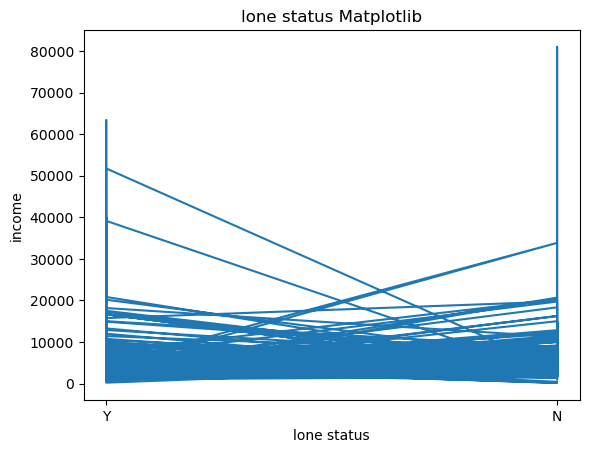

In [10]:
plt.plot('Loan_Status','ApplicantIncome', data=df )
plt.title('lone status Matplotlib')
plt.xlabel('lone status')
plt.ylabel('income')
plt.show()

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


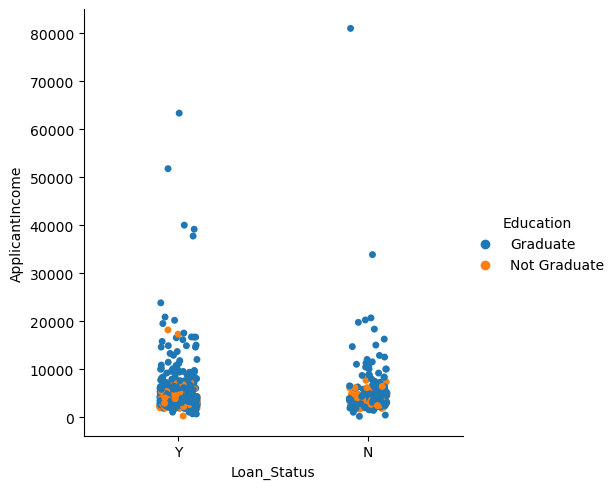

In [11]:
sns.catplot(x='Loan_Status',y='ApplicantIncome', data=df,hue='Education')


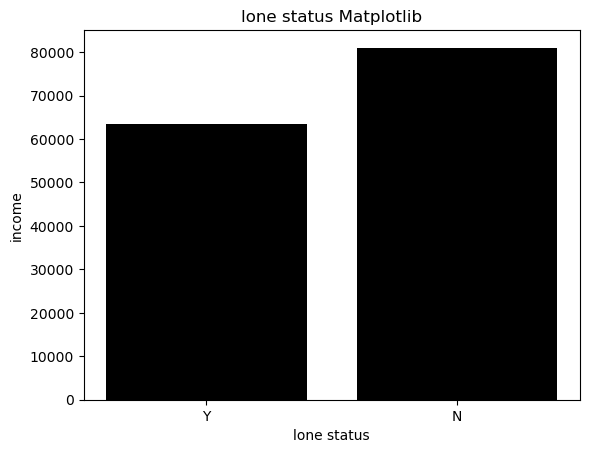

In [12]:
plt.bar('Loan_Status','ApplicantIncome', data=df, color='black')
plt.title('lone status Matplotlib')
plt.xlabel('lone status')
plt.ylabel('income')
plt.show()

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


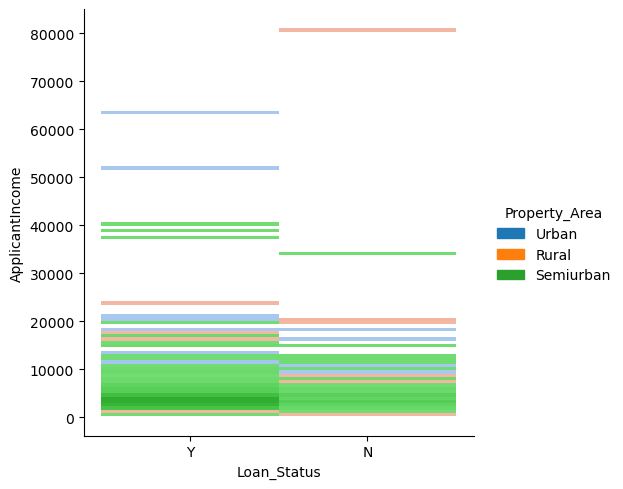

In [15]:
sns.displot(x='Loan_Status',y='ApplicantIncome', data=df, hue='Property_Area')

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

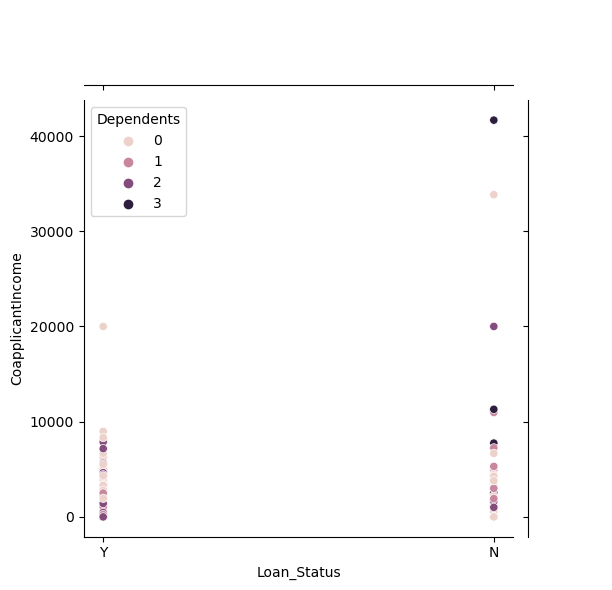

In [14]:
sns.jointplot(x='Loan_Status',y='CoapplicantIncome', data=df, hue='Dependents')

In [35]:
df['Gender'] = df['Gender'].replace({'Male':0, 'Female':1,'unknown' : 2})

In [36]:
df['Married'] = df['Married'].replace({'Yes' :1, 'No': 0, 'unknown':2})


In [37]:
df['Education'] = df['Education'].replace ({'Graduate' : 1, 'Not Graduate' : 0})

In [70]:
df['Property_Area'] = df['Property_Area'].replace ({'Semiurban': 1,'Urban' : 0, 'Rural':2})

In [71]:
df['Self_Employed'] = df['Self_Employed'].replace ({'Yes': 1,'No' : 0, 'unknown':2})

In [72]:
df['Loan_Status'] = df['Loan_Status'].replace({'Y':1, 'N':0})

KeyError: 'Loan_Status'

In [73]:
print(df.head())

   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       0        0           0          1              0             5849   
1       0        1           1          1              0             4583   
2       0        1           0          1              1             3000   
3       0        1           0          0              0             2583   
4       0        0           0          1              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Property_Area  
0                0.0         146               360              0  
1             1508.0         128               360              2  
2                0.0          66               360              0  
3             2358.0         120               360              0  
4                0.0         141               360              0  


In [74]:
print(df)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         0        0           0          1              0             5849   
1         0        1           1          1              0             4583   
2         0        1           0          1              1             3000   
3         0        1           0          0              0             2583   
4         0        0           0          1              0             6000   
..      ...      ...         ...        ...            ...              ...   
609       1        0           0          1              0             2900   
610       0        1           3          1              0             4106   
611       0        1           1          1              0             8072   
612       0        1           2          1              0             7583   
613       1        0           0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [78]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area
0,0,0,0,1,0,5849,0.0,146,360,0
1,0,1,1,1,0,4583,1508.0,128,360,2
2,0,1,0,1,1,3000,0.0,66,360,0
3,0,1,0,0,0,2583,2358.0,120,360,0
4,0,0,0,1,0,6000,0.0,141,360,0


In [80]:
x=df.iloc[:, :-1].values
y=df.iloc[:, 4].values

In [81]:
print(df.head())

   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       0        0           0          1              0             5849   
1       0        1           1          1              0             4583   
2       0        1           0          1              1             3000   
3       0        1           0          0              0             2583   
4       0        0           0          1              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Property_Area  
0                0.0         146               360              0  
1             1508.0         128               360              2  
2                0.0          66               360              0  
3             2358.0         120               360              0  
4                0.0         141               360              0  


In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20)

In [83]:
knn = KNeighborsClassifier()

In [87]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [86]:
knn.score(x_train,y_train)

0.8757637474541752